In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path=r'C:\Users\emmam\Documents\nlb\data\HouseSale_Price.csv'

In [2]:
df = pd.read_csv(data_path)

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
def sort_scatter_on_val(df, col):
    s= pd.Series(df[col].unique()).sort_values()
    #s=s[:-1]
    s= s.reset_index()
    s= s.drop('index', axis=1) # drop original index
    s= s.reset_index()
    s.columns = ['ix', col]
    #display(s, type(s))
    return(
    s.plot.scatter(x='ix', y=col,figsize=(15,10))
    )

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

'Sale price is mostly distributed between 129975 - 214000 with few outliers outside that range.'

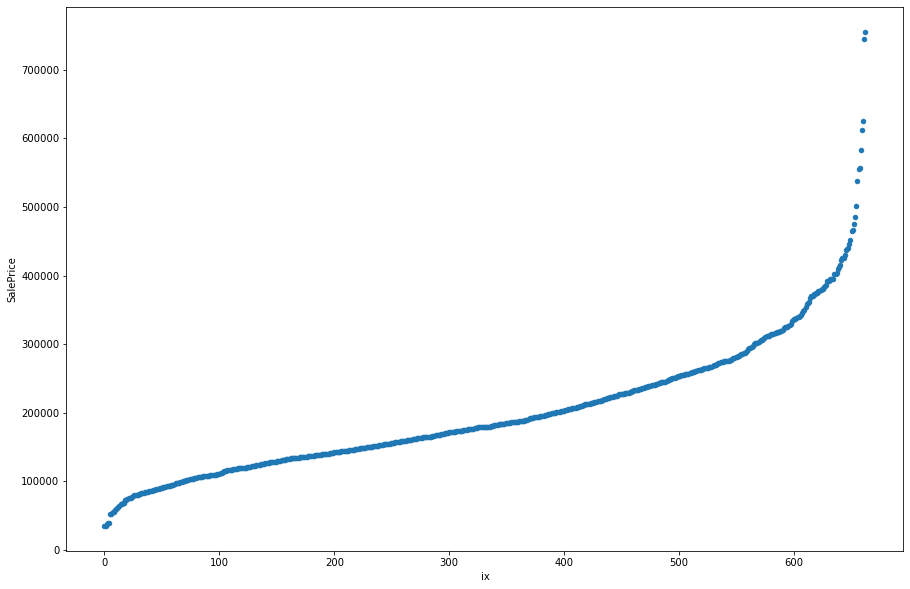

In [13]:
# Plot the House Sales Price and write your statistical observations.

sort_scatter_on_val(df, 'SalePrice')
display(df['SalePrice'].describe())

"Sale price is mostly distributed between 129975 - 214000 with some outliers outside that range."

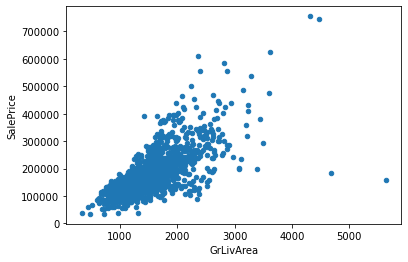

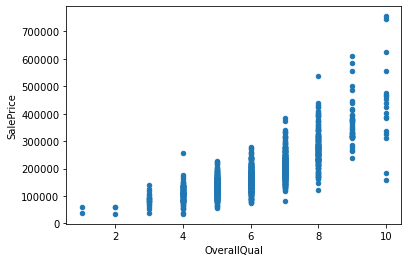

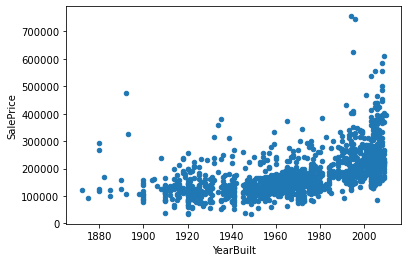

In [21]:
# Display bivariate relationship for numerical variables - GrLivArea, SalePrice, OverallQual

ax0= df.plot.scatter(x='GrLivArea', y='SalePrice', )
plt.show()

ax1= df.plot.scatter(x='OverallQual', y='SalePrice', )
plt.show()

# Visualize how the sale price is related to OverallQual and YearBuilt.

'Scatterplot ax1 shows some mild positive correlation between OverallQual & SalesPrice. However, that correlation weakens as OverallQual approaches maximum'

ax2 = df.plot.scatter(x='YearBuilt', y='SalePrice')


GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
dtype: float64

<AxesSubplot:>

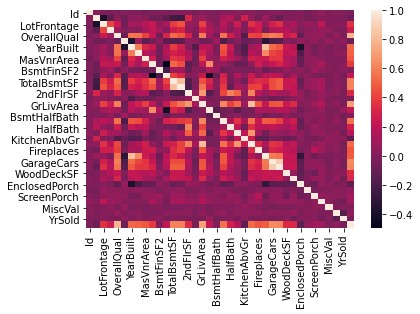

In [77]:

# With multivariate visualizations, select the 10 most correlated columns. Print out these column names.

c0 = abs(df.corr())
c1 = c0.unstack()
c1 = c1.sort_values(ascending=False)
c2 = c1[c1!=1]
display(c2[:10])

sns.heatmap(df.corr())


In [63]:
# Display the total count as well as the percentage value of the missing values for each column. 
for c in df.columns:
    ttl_na = df[c].isna().sum()
    pct_na = ttl_na/len(df)
    print(f"Column:{c}\nnans:{ttl_na}\nproportion:{pct_na}\n\n")

Column:Id
nans:0
proportion:0.0


Column:MSSubClass
nans:0
proportion:0.0


Column:MSZoning
nans:0
proportion:0.0


Column:LotFrontage
nans:259
proportion:0.1773972602739726


Column:LotArea
nans:0
proportion:0.0


Column:Street
nans:0
proportion:0.0


Column:Alley
nans:1369
proportion:0.9376712328767123


Column:LotShape
nans:0
proportion:0.0


Column:LandContour
nans:0
proportion:0.0


Column:Utilities
nans:0
proportion:0.0


Column:LotConfig
nans:0
proportion:0.0


Column:LandSlope
nans:0
proportion:0.0


Column:Neighborhood
nans:0
proportion:0.0


Column:Condition1
nans:0
proportion:0.0


Column:Condition2
nans:0
proportion:0.0


Column:BldgType
nans:0
proportion:0.0


Column:HouseStyle
nans:0
proportion:0.0


Column:OverallQual
nans:0
proportion:0.0


Column:OverallCond
nans:0
proportion:0.0


Column:YearBuilt
nans:0
proportion:0.0


Column:YearRemodAdd
nans:0
proportion:0.0


Column:RoofStyle
nans:0
proportion:0.0


Column:RoofMatl
nans:0
proportion:0.0


Column:Exterior1st
nans:

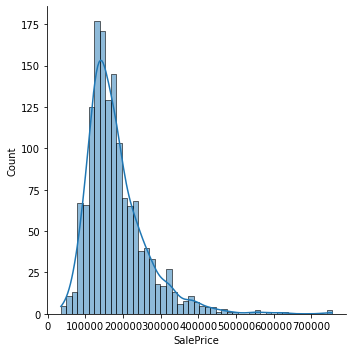

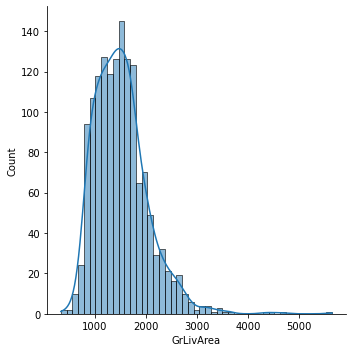

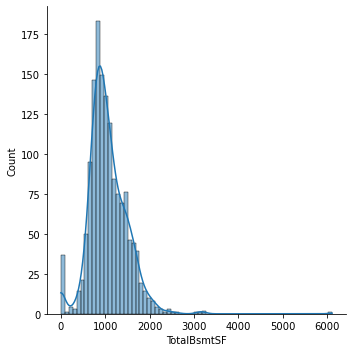

In [75]:
# Look for Normality using plots on SalesPrice, GrLivArea, and TotalBsmtSF.
sns.displot(x='SalePrice', data=df, kde=True)

sns.displot(x='GrLivArea', data=df, kde=True)

sns.displot(x='TotalBsmtSF', data=df, kde=True)
